**This notebook is to answer the task: Correlation between views and likes.**

This notebook is my second draft (content complete). I encourage constructive feedback. As time allows I will revisit this notebook and polish it up (for instance hte spelling mistakes).

The conclusion is that there is a strong positive corrolation between views and likes on youtube.

In [1]:
import numpy as np
import pandas as pd

We'll start with a subset of the data (US) before expanding to include the entire dataset

In [2]:
us_yt = pd.read_csv('../input/youtube-new/USvideos.csv')

In [3]:
display(us_yt.head())
print(us_yt.columns)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [4]:
#another curiousity of mine
us_yt.category_id.nunique()#.unique_count().sum()

16

In [5]:
corrolation_list = ['views', 'likes', 'dislikes', 'comment_count']
hm_data = us_yt[corrolation_list].corr() 
display(hm_data)
#This will trim down the number of columns we are looking for corrolations between
#this exceeds the scope of the initial question but i want to know a little more for myself

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


this is the pearson corrolation values:
1 = a strong positive corrolation
0 = no corrolation
-1 = strong negitive corrolation.

This shows that there is a strong positive corrolation with number of likes and number of views, while there is a moderate corrolation between views and comment count

In [6]:
import matplotlib as plt
import seaborn as sns

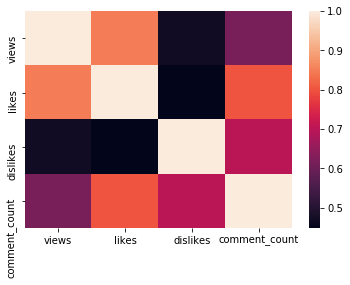

In [7]:
# to help you vizualise these corrolations, see the plots below
# the lighter the colour the higher the corrolation 
sns.heatmap(hm_data)

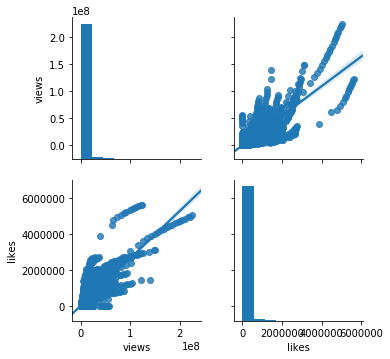

In [8]:
sns.pairplot(us_yt[['views', 'likes']], kind='reg')

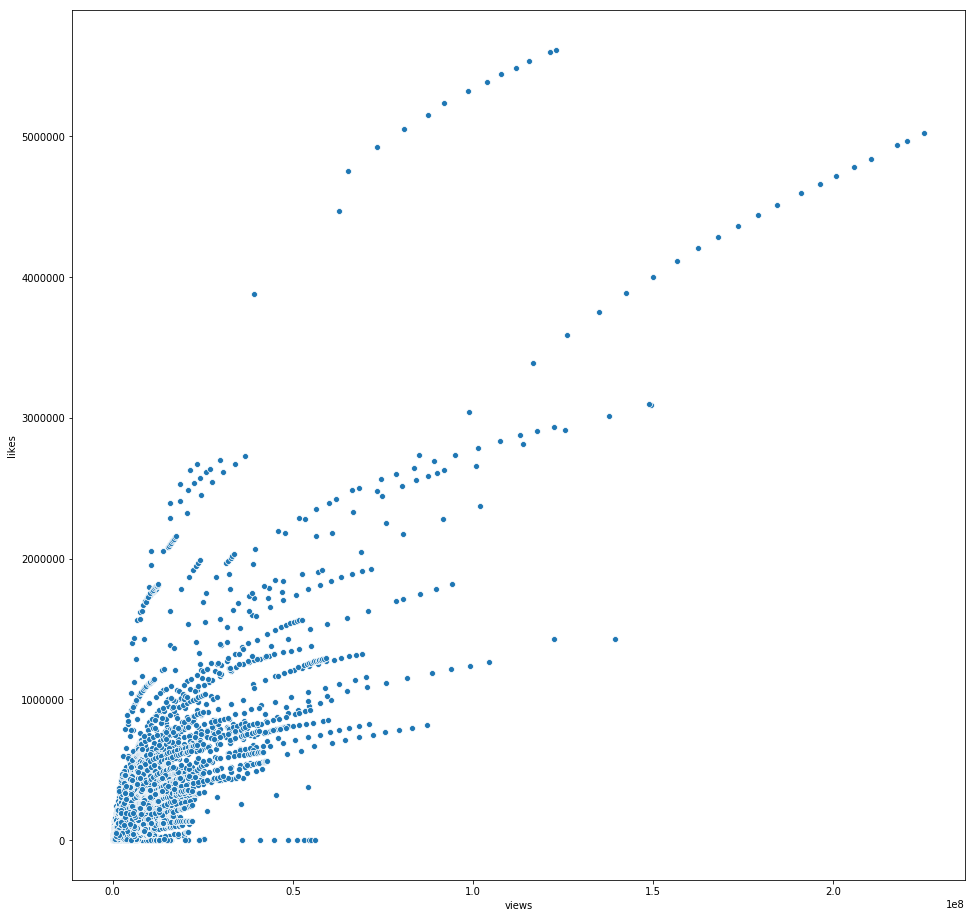

In [9]:
import matplotlib.pyplot
#to get a closer look at the scatterplot for likes/views
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=us_yt['views'], y=us_yt['likes'])

**Now to see if these corrolations generalize well**

Now that we see the corrolation coeficient for the US data, lets now see how much these trends stay the same in other counties

In [10]:
#For these datasets we will use a subset of the columns, certain columns have characters that
#the dataframe can't currently handle and since those columns don't contain meaningful data for
#this usecase I'm electing to simply drop them
col_list = ['video_id', 'views', 'likes', 'dislikes', 'comment_count']

us_yt = pd.read_csv('../input/youtube-new/USvideos.csv', usecols=col_list) #USA, remaking the dataframe in the same format as the others
ca_yt = pd.read_csv('../input/youtube-new/CAvideos.csv', usecols=col_list) #Canada
de_yt = pd.read_csv('../input/youtube-new/DEvideos.csv', usecols=col_list) #Germany
fr_yt = pd.read_csv('../input/youtube-new/FRvideos.csv', usecols=col_list) #France
gb_yt = pd.read_csv('../input/youtube-new/GBvideos.csv', usecols=col_list) #United Kingdom (Great Brittain)
in_yt = pd.read_csv('../input/youtube-new/INvideos.csv', usecols=col_list) #India
jp_yt = pd.read_csv('../input/youtube-new/JPvideos.csv', usecols=col_list) #Japan
kr_yt = pd.read_csv('../input/youtube-new/KRvideos.csv', usecols=col_list) #South Korea
mx_yt = pd.read_csv('../input/youtube-new/MXvideos.csv', usecols=col_list) #Mexico
ru_yt = pd.read_csv('../input/youtube-new/RUvideos.csv', usecols=col_list) #Russia

In [11]:
df_list = [us_yt, ca_yt, de_yt, fr_yt, gb_yt, in_yt, jp_yt, kr_yt, mx_yt, ru_yt]
df_name_list = ['United States', 'Canada', 'Germany', 'France', 'Great Brittain', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']


In [12]:
views_df = pd.DataFrame(columns=['views', 'likes', 'dislikes', 'comment_count'])
likes_df = pd.DataFrame(columns=['views', 'likes', 'dislikes', 'comment_count'])

display(views_df, likes_df)

,views,likes,dislikes,comment_count


,views,likes,dislikes,comment_count


In [13]:
count = 0
while count != 10:
    print(df_name_list[count])
    current_df = df_list[count]
    _x = current_df[corrolation_list].corr()
    display(_x)
    views_df.loc[count] = _x.loc['views']
    likes_df.loc[count] = _x.loc['likes']
    count += 1
# Hid output to keep the size of the notebook down, feel free to unhide it to see more of the data

United States


,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


Canada


,views,likes,dislikes,comment_count
views,1.000000,0.828964,0.557621,0.693107
likes,0.828964,1.000000,0.460427,0.836585
dislikes,0.557621,0.460427,1.000000,0.643494
comment_count,0.693107,0.836585,0.643494,1.000000


Germany


,views,likes,dislikes,comment_count
views,1.000000,0.824189,0.556000,0.705516
likes,0.824189,1.000000,0.460208,0.852492
dislikes,0.556000,0.460208,1.000000,0.642144
comment_count,0.705516,0.852492,0.642144,1.000000


France


,views,likes,dislikes,comment_count
views,1.000000,0.812569,0.586997,0.708161
likes,0.812569,1.000000,0.450548,0.849647
dislikes,0.586997,0.450548,1.000000,0.664893
comment_count,0.708161,0.849647,0.664893,1.000000


Great Brittain


,views,likes,dislikes,comment_count
views,1.000000,0.795862,0.392407,0.466899
likes,0.795862,1.000000,0.446746,0.744361
dislikes,0.392407,0.446746,1.000000,0.771772
comment_count,0.466899,0.744361,0.771772,1.000000


India


,views,likes,dislikes,comment_count
views,1.000000,0.850096,0.543294,0.674195
likes,0.850096,1.000000,0.494560,0.780514
dislikes,0.543294,0.494560,1.000000,0.708125
comment_count,0.674195,0.780514,0.708125,1.000000


Japan


,views,likes,dislikes,comment_count
views,1.000000,0.850367,0.804670,0.843851
likes,0.850367,1.000000,0.732570,0.940304
dislikes,0.804670,0.732570,1.000000,0.809898
comment_count,0.843851,0.940304,0.809898,1.000000


South Korea


,views,likes,dislikes,comment_count
views,1.000000,0.860043,0.581443,0.807600
likes,0.860043,1.000000,0.428036,0.922731
dislikes,0.581443,0.428036,1.000000,0.555549
comment_count,0.807600,0.922731,0.555549,1.000000


Mexico


,views,likes,dislikes,comment_count
views,1.000000,0.798751,0.556964,0.677812
likes,0.798751,1.000000,0.443179,0.845787
dislikes,0.556964,0.443179,1.000000,0.634587
comment_count,0.677812,0.845787,0.634587,1.000000


Russia


,views,likes,dislikes,comment_count
views,1.000000,0.820236,0.468503,0.732241
likes,0.820236,1.000000,0.382125,0.845933
dislikes,0.468503,0.382125,1.000000,0.487527
comment_count,0.732241,0.845933,0.487527,1.000000


In [14]:
views_df = views_df.drop(axis=1, labels='views') #remove redundant column
views_df.index = df_name_list
display(views_df) ## Master Data frame with all the corrolation coefficients in relation to views 

,likes,dislikes,comment_count
United States,0.849177,0.472213,0.617621
Canada,0.828964,0.557621,0.693107
Germany,0.824189,0.556000,0.705516
France,0.812569,0.586997,0.708161
Great Brittain,0.795862,0.392407,0.466899
India,0.850096,0.543294,0.674195
Japan,0.850367,0.804670,0.843851
South Korea,0.860043,0.581443,0.807600
Mexico,0.798751,0.556964,0.677812
Russia,0.820236,0.468503,0.732241


In [15]:
likes_df = likes_df.drop(axis=1, labels='likes') #remove redundant column
likes_df.index = df_name_list
display(likes_df) ## Master Data frame with all the corrolation coefficients in relation to likes

,views,dislikes,comment_count
United States,0.849177,0.447186,0.803057
Canada,0.828964,0.460427,0.836585
Germany,0.824189,0.460208,0.852492
France,0.812569,0.450548,0.849647
Great Brittain,0.795862,0.446746,0.744361
India,0.850096,0.494560,0.780514
Japan,0.850367,0.732570,0.940304
South Korea,0.860043,0.428036,0.922731
Mexico,0.798751,0.443179,0.845787
Russia,0.820236,0.382125,0.845933


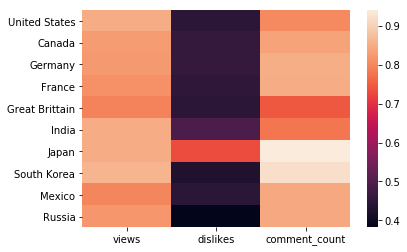

In [16]:
sns.heatmap(likes_df)

We can see that there is a high corrolation between number of likes on a video and the number of views. Also an interesting note: likes and comment count has an incredibly high corrolation in Japan, Japan also has a weirdly high corrolation between dislikes, likes and views (one could also rephrase this to a high corrolation between reactions and views). There are other interesting little tidbits in the data.

(obligitory corrolation =/= causation speil)Without seeing this data in timelapse one couldn't determine if a perticular variable is the cause of the other. For instance: are videos that are watched frequently more likely to be liked by a veiwer, or does a video recieving a large number of likes cause it to be recommended frequently. Or perhaps neither is the cause of the other and perhaps some confounding variable is the cause of both of these.

In [17]:
Master_df = pd.DataFrame(columns=['views', 'likes', 'dislikes', 'comment_count', 'country'])
display(Master_df)

,views,likes,dislikes,comment_count,country


In [18]:
#now to create a master dataframe with all the datapoints in it
count = 0
entries = 0
while count != 10:
    current_df = df_list[count]
    entries = entries + len(current_df)
    country_name = df_name_list[count]
    current_df['country'] = country_name
    Master_df = pd.merge(Master_df, current_df, how='outer')
    count += 1
print(entries)

375942


In [19]:
print(entries) 
print(len(Master_df)) #compairing the total number of entries to make sure i didn't loose any data points
display(Master_df.sample(10))


375942
375942


,video_id,views,likes,dislikes,comment_count,country
86281,HjtYoh3lX_4,3656,79,2,4,Germany
288039,6WmcAW4gnd4,204913,5965,561,1048,South Korea
109213,OaRswUq6TP4,286672,3422,179,572,Germany
296371,Wqdu7aTt3XE,157133,1065,192,31,Mexico
155644,vgxq7ouQP0g,226688,2371,125,1704,France
252328,zBzmaG0sDDw,84872,5775,124,1074,Japan
354818,1zdHAXjT84c,109800,415,7957,811,Russia
60646,eODvXG-yfhE,34886,0,0,98,Canada
294037,h05_pvLzmts,148728,2571,86,467,South Korea
148611,MlR3Uvw8vAQ,203636,10645,166,279,France


In [20]:
Master_df[corrolation_list].corr()

,views,likes,dislikes,comment_count
views,1.000000,0.777796,0.421653,0.510030
likes,0.777796,1.000000,0.453710,0.794490
dislikes,0.421653,0.453710,1.000000,0.705182
comment_count,0.510030,0.794490,0.705182,1.000000


**Now for one last scatterplot**

As you can see below the trend below seems to follow for each country in the datasets

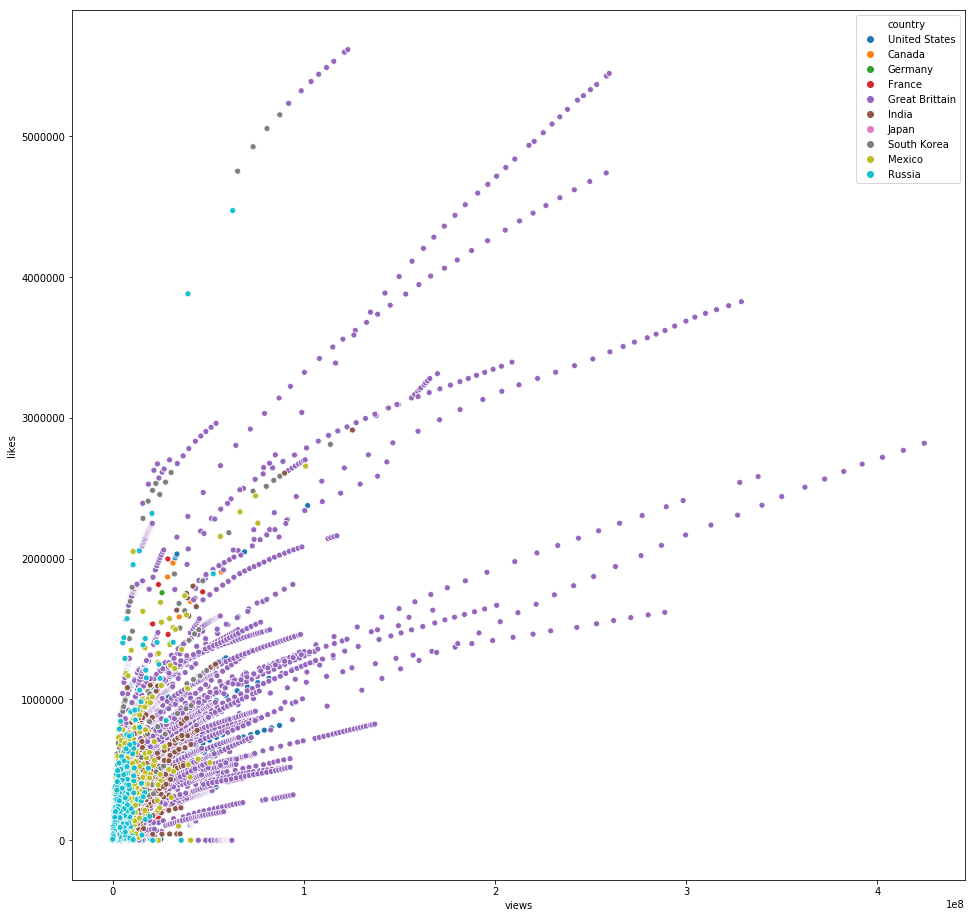

In [21]:
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=Master_df["views"], y=Master_df["likes"], hue=Master_df["country"])

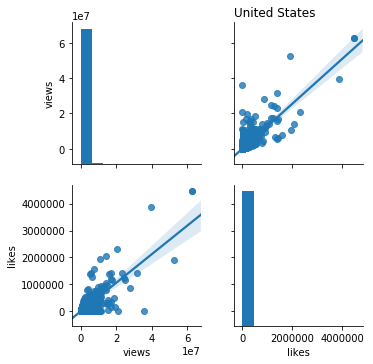

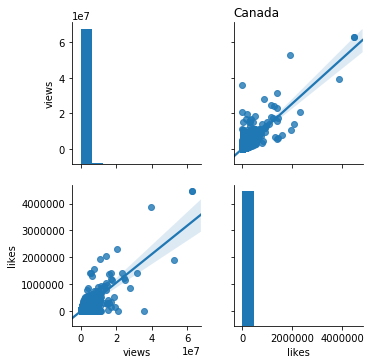

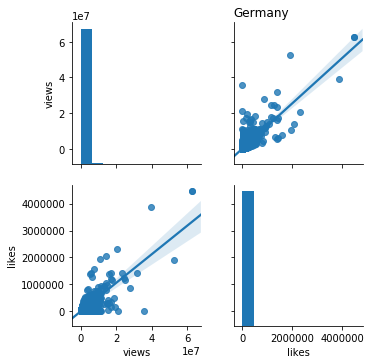

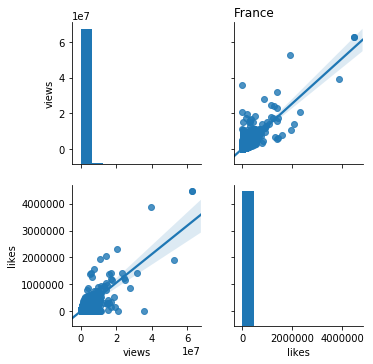

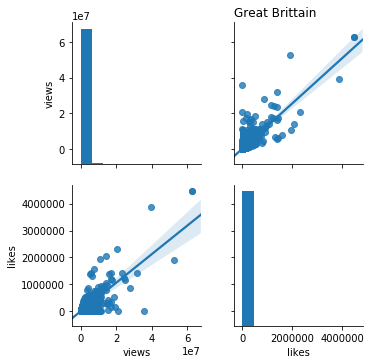

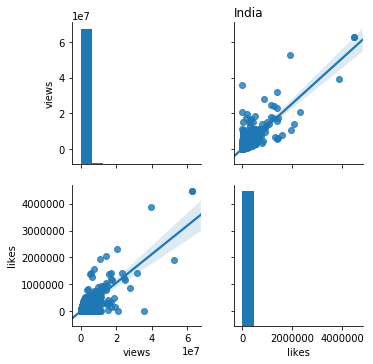

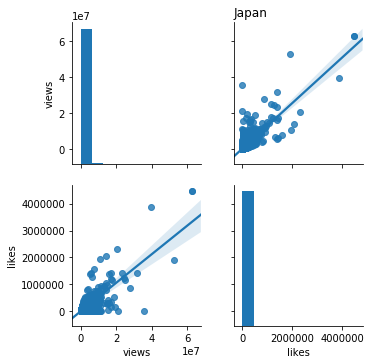

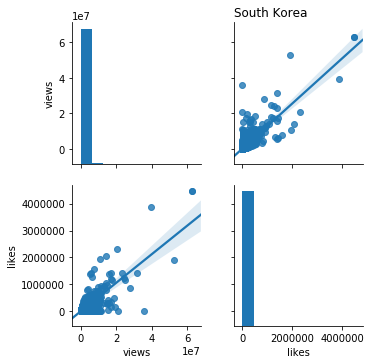

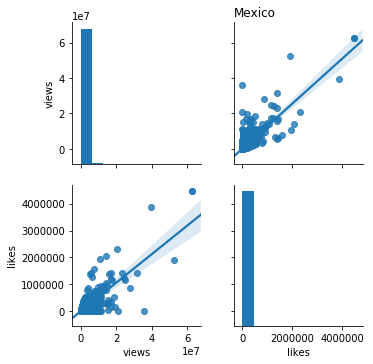

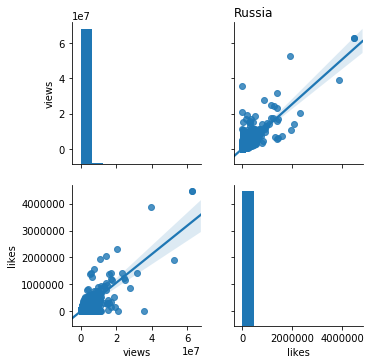

In [22]:
#Set of pairplots for this set of datasets, flashy, but doesn't communicate meaning concisely
#initially had this earlier in the presentation but moved it to the end because it didn't add value but i didn't want to delete it either
import matplotlib.pyplot
count = 0
while count != 10:
    sns.pairplot(current_df[['views', 'likes']], kind='reg')
    matplotlib.pyplot.title(df_name_list[count],loc='left')
    count += 1